In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

# Perceptrons

Perceptrons are simply individual models which are optimized together in a network. Let's use classification to understand them. Here is some highly mixed data:

Datasets: circles=training, light-crosses=test [and red=class_1, blue=class_2]


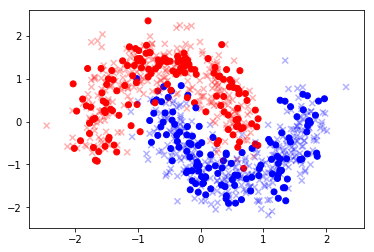

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons

# Create artificial dataset (classification problem within 2 classes within R^2 input space)
X, y = make_moons(n_samples=900, noise=0.2, random_state=0)

# Preprocess dataset, and split into training and test part
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7)

# Encode class labels as binary vector (with exactly ONE bit set to 1, and all others to 0)
Y_train_OneHot = np.eye(2)[y_train]
Y_test_OneHot = np.eye(2)[y_test]

# Plot training+testing dataset
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

# Plot the training points...
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
#   ...and testing points
plt.scatter(X_test[:, 0], X_test[:, 1], marker='x', c=y_test, cmap=cm_bright, alpha=0.3)

print("Datasets: circles=training, light-crosses=test [and red=class_1, blue=class_2]")

We will first define a classifier with a single node. This is simply a linear classifier! Using SGD, this will do no better than our linear classifiers from before.

In [3]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(1,), solver='sgd', 
                    batch_size=4, learning_rate_init=0.005,
                    max_iter=500, shuffle=True)
# Train the MLP classifier on training dataset
clf.fit(X_train, Y_train_OneHot)
print("Number of layers: ", clf.n_layers_)
print("Number of outputs: ", clf.n_outputs_)


Number of layers:  3
Number of outputs:  2


This network has 2 outputs, meaning the given classification will be whichever output is higher. We can also ask for the probability estimates, which in a multi-class problem might give better understanding of how well we classified things.

In [4]:
print(clf.predict(X_train)[1:5, :])
print(clf.predict_proba(X_train)[1:5, :])

[[1 0]
 [1 0]
 [0 1]
 [0 1]]
[[0.96063895 0.03935438]
 [0.83704991 0.16293528]
 [0.02598676 0.97401629]
 [0.03190853 0.96809491]]


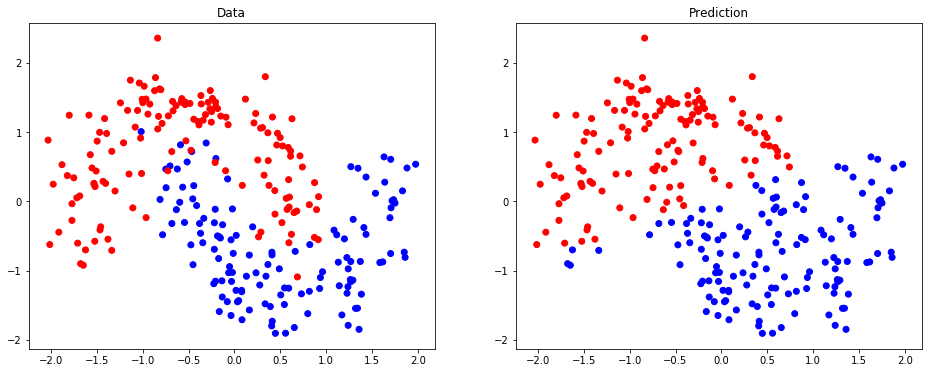

In [5]:
h = np.argmax(clf.predict(X_train), axis=1)
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
ax[0].set_title("Data");
ax[1].scatter(X_train[:, 0], X_train[:, 1], c=h, cmap=cm_bright)
ax[1].set_title("Prediction");

In [6]:
print("Train accuracy: ", clf.score(X_train, Y_train_OneHot), " test accuracy:", clf.score(X_test,Y_test_OneHot))

Train accuracy:  0.837037037037037  test accuracy: 0.8809523809523809


However, we can change the architecture of our multi-layer perceptron to include more nodes. First, let's increase the size of our single hidden layer.

Train accuracy:  0.9444444444444444  test accuracy: 0.9698412698412698


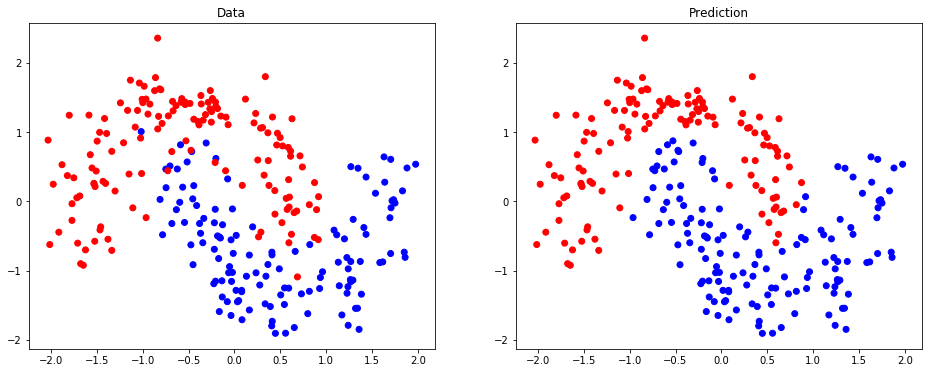

In [7]:
clf = MLPClassifier(hidden_layer_sizes=(10,), solver='sgd', 
                    batch_size=4, learning_rate_init=0.005,
                    max_iter=500, shuffle=True)
clf.fit(X_train, Y_train_OneHot)
h = np.argmax(clf.predict(X_train), axis=1)
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
ax[0].set_title("Data");
ax[1].scatter(X_train[:, 0], X_train[:, 1], c=h, cmap=cm_bright)
ax[1].set_title("Prediction");
print("Train accuracy: ", clf.score(X_train, Y_train_OneHot), " test accuracy:", clf.score(X_test,Y_test_OneHot))

Using backpropagation, we can also add multiple layers to the model.

Number of layers:  4
Number of outputs:  2
Train accuracy:  0.9407407407407408  test accuracy: 0.9698412698412698


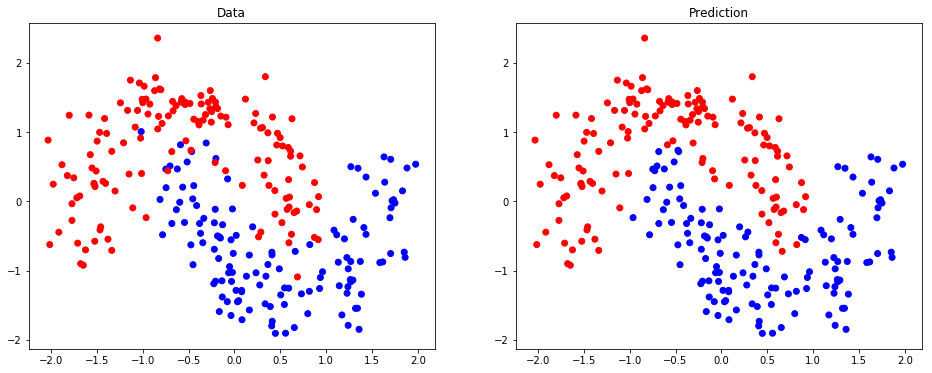

In [8]:
clf = MLPClassifier(hidden_layer_sizes=(10,10), solver='sgd', 
                    batch_size=4, learning_rate_init=0.005,
                    max_iter=500, shuffle=True)
clf.fit(X_train, Y_train_OneHot)
print("Number of layers: ", clf.n_layers_)
print("Number of outputs: ", clf.n_outputs_)
h = np.argmax(clf.predict(X_train), axis=1)
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
ax[0].set_title("Data");
ax[1].scatter(X_train[:, 0], X_train[:, 1], c=h, cmap=cm_bright)
ax[1].set_title("Prediction");
print("Train accuracy: ", clf.score(X_train, Y_train_OneHot), " test accuracy:", clf.score(X_test,Y_test_OneHot))

<div class="alert alert-success">
    <b>EXERCISE</b>:
     <ul>
      <li>
      Download ``03_mlp_iris.py`` from the course website. We start with a single hidden layer of 4 neurons. Modify the architecture to get a better classification accuracy.
      </li>
    </ul>
</div>

Number of layers:  3
Number of outputs:  4
Train accuracy:  0.6666666666666666  test accuracy: 0.6666666666666666


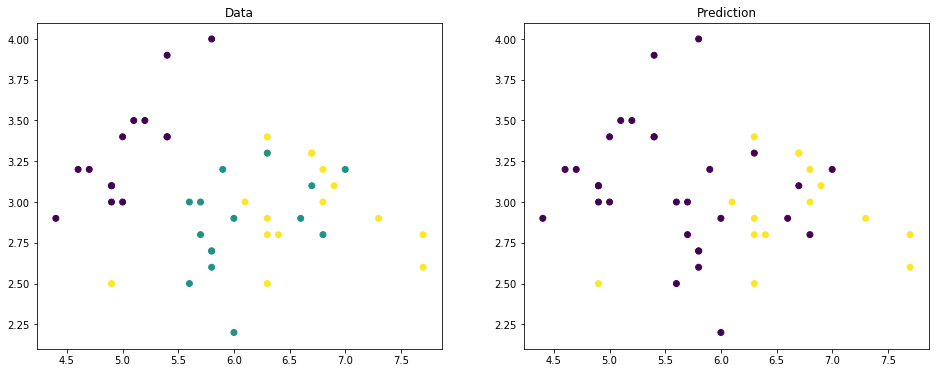

In [9]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7)

# Encode class labels as binary vector (with exactly ONE bit set to 1, and all others to 0)
Y_train_OneHot = np.eye(4)[y_train]
Y_test_OneHot = np.eye(4)[y_test]

clf = MLPClassifier(hidden_layer_sizes=(4,), solver='sgd', 
                    batch_size=4, learning_rate_init=0.005,
                    max_iter=500, shuffle=True)
clf.fit(X_train, Y_train_OneHot)
print("Number of layers: ", clf.n_layers_)
print("Number of outputs: ", clf.n_outputs_)
h = np.argmax(clf.predict(X_train), axis=1)
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap="viridis")
ax[0].set_title("Data");
ax[1].scatter(X_train[:, 0], X_train[:, 1], c=h, cmap="viridis")
ax[1].set_title("Prediction");
print("Train accuracy: ", clf.score(X_train, Y_train_OneHot), " test accuracy:", clf.score(X_test,Y_test_OneHot))